In [ ]:
!pip install qiskit
!pip install qiskit[visualization]

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile, assemble, Aer
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
import random
sim = Aer.get_backend('qasm_simulator',shots=1) 

## **Classical Blackjack using Quantum Circuit**:


Hit Operator 

*Operator which helps us simulate the action of drawing a card from the deck of cards, the control bit is responsible for the probablity of the type of card the player pulls out. The operator contains 3 qubits and the operator works in a way so that the probability of drawing every card is equal.*

EWL PROTOCOL

*The EWL protocol is a quantum circuit that takes in as input a 2 qubit state (generally).
With each qubit belonging to one player. This state is acted upon by the referee to produce a higher-order randomization in the form of a quantum superposition followed by measurement. There are many modifed EWL protocls used in specific type of quantum games, our project uses one.*

In [ ]:
def snackjack(ixyz):
  # creating the scary hit operator 
  qc1 = QuantumCircuit(2)
  qc1.swap(0, 1)
  hit_mini = qc1.to_gate().control(1) # our two controls are the d copy and the strategy
  qc2 = QuantumCircuit(12) # all d dcopy player and single strat qubit
  for x in range(12, 2):
    qc2.append(hit_mini, [x+2, x, x+1]) # swap the middle two based on strat and dcopy
  hit_operator = qc2.to_gate(label = "hit operator").control(3)
  hit_operator_1 = qc2.to_gate(label = "hit operator").control(2)

  sj_circuit = QuantumCircuit(20, 2)
  # all qubit indices and prep

  D_states = [i for i in range(4)]
  D_copy_states = [i+4 for i in range(4)]
  player_states = [i+4 for i in range(4)]
  cont_states = [i for i in range(12,14)]
  for state in cont_states:
    sj_circuit.h(state)

  player_strat = 14
  dealer_states = [i for i in range(15, 15+4)]
  dealer_strat = 19

  # deck
  sj_circuit.x(1)
  sj_circuit.x(3)
  # deck copy
  sj_circuit.x(5)
  sj_circuit.x(7)
  # player's hand
  sj_circuit.x(8)
  # dealer's hand
  sj_circuit.x(17)

  # if the input is a hit apply the x gate
  if ixyz.upper() == "X":
    sj_circuit.x(14)
  elif ixyz.upper() == "Y":
    sj_circuit.h(14)
  elif ixyz.upper() == "Z":
    sj_circuit.z(14)
  else:
    pass

  qbit = [14]
  for state in cont_states:
    qbit.append(state)
  for i in range(12):
    qbit.append(i)
  sj_circuit.append(hit_operator,qbit)
  sj_circuit.barrier()

  qbits = []
  counts = {}
  for state in cont_states:
    qbits.append(state)
  for i in range(8):
    qbits.append(i)
  for i in range(15,19):
    qbits.append(i)
  sj_circuit.append(hit_operator_1,qbits)

  sj_circuit.measure(cont_states,[i for i in range(2)])
  counts = sim.run(transpile(sj_circuit,sim),shots=1).result().get_counts(sj_circuit)

  while '11' not in counts:
    sj_circuit.reset(12)
    sj_circuit.reset(13)
    sj_circuit.h(12)
    sj_circuit.h(13)
    qbits = []
    for state in cont_states:
      qbits.append(state)
    for i in range(8):
      qbits.append(i)
    for i in range(15,19):
      qbits.append(i)
    sj_circuit.append(hit_operator_1,qbits)

    sj_circuit.measure(cont_states,[i for i in range(2)])
    counts = sim.run(transpile(sj_circuit,sim),shots=1).result().get_counts(sj_circuit)

  return sj_circuit,counts

In [ ]:
circuit,counts = snackjack('X')
circuit.draw()

┌────────────────┐ ░ ┌────────────────┐                  »
 q_0: ─────┤0               ├─░─┤0               ├──────────────────»
      ┌───┐│                │ ░ │                │                  »
 q_1: ┤ X ├┤1               ├─░─┤1               ├──────────────────»
      └───┘│                │ ░ │                │                  »
 q_2: ─────┤2               ├─░─┤2               ├──────────────────»
      ┌───┐│                │ ░ │                │                  »
 q_3: ┤ X ├┤3               ├─░─┤3               ├──────────────────»
      └───┘│                │ ░ │                │                  »
 q_4: ─────┤4               ├─░─┤4               ├──────────────────»
      ┌───┐│                │ ░ │                │                  »
 q_5: ┤ X ├┤5               ├─░─┤5               ├──────────────────»
      └───┘│   hit operator │ ░ │                │                  »
 q_6: ─────┤6               ├─░─┤6               ├──────────────────»
      ┌───┐│                │ ░ │                │                  »
 q_7: ┤ X ├┤7               ├─░─┤7               ├──────────────────»
      ├───┤│                │ ░ │                │                  »
 q_8: ┤ X ├┤8               ├─░─┤                ├──────────────────»
      └───┘│                │ ░ │                │                  »
 q_9: ─────┤9               ├─░─┤   hit operator ├──────────────────»
           │                │ ░ │                │                  »
q_10: ─────┤10              ├─░─┤                ├──────────────────»
           │                │ ░ │                │                  »
q_11: ─────┤11              ├─░─┤                ├──────────────────»
      ┌───┐└───────┬────────┘ ░ │                │┌─┐     ┌───┐     »
q_12: ┤ H ├────────■──────────░─■                ├┤M├─|0>─┤ H ├─────»
      ├───┤        │          ░ │                │└╥┘ ┌─┐ └───┘┌───┐»
q_13: ┤ H ├────────■──────────░─■                ├─╫──┤M├──|0>─┤ H ├»
      ├───┤        │          ░ │                │ ║  └╥┘      └───┘»
q_14: ┤ X ├────────■──────────░─┤                ├─╫───╫────────────»
      └───┘                   ░ │                │ ║   ║            »
q_15: ────────────────────────░─┤8               ├─╫───╫────────────»
                              ░ │                │ ║   ║            »
q_16: ────────────────────────░─┤9               ├─╫───╫────────────»
      ┌───┐                   ░ │                │ ║   ║            »
q_17: ┤ X ├───────────────────░─┤10              ├─╫───╫────────────»
      └───┘                   ░ │                │ ║   ║            »
q_18: ────────────────────────░─┤11              ├─╫───╫────────────»
                              ░ └────────────────┘ ║   ║            »
q_19: ────────────────────────░────────────────────╫───╫────────────»
                              ░                    ║   ║            »
 c: 2/═════════════════════════════════════════════╩═══╩════════════»
                                                   0   1            »
«      ┌────────────────┐                  ┌────────────────┐                  »
« q_0: ┤0               ├──────────────────┤0               ├──────────────────»
«      │                │                  │                │                  »
« q_1: ┤1               ├──────────────────┤1               ├──────────────────»
«      │                │                  │                │                  »
« q_2: ┤2               ├──────────────────┤2               ├──────────────────»
«      │                │                  │                │                  »
« q_3: ┤3               ├──────────────────┤3               ├──────────────────»
«      │                │                  │                │                  »
« q_4: ┤4               ├──────────────────┤4               ├──────────────────»
«      │                │                  │                │                  »
« q_5: ┤5               ├──────────────────┤5               ├──────────────────»
«      │                │    

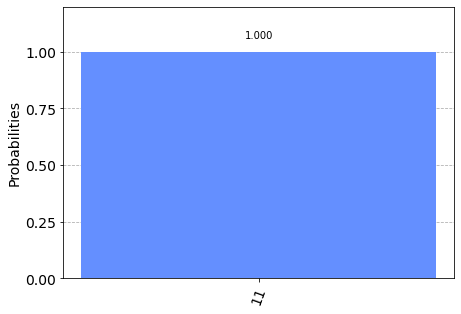

In [ ]:
plot_histogram(counts)

## **Quantum SnackJack with entanglement**:

In [ ]:
def snaqjaq(ixyz):
  # creating the scary hit operator 
  qc1 = QuantumCircuit(2)
  qc1.swap(0, 1)
  hit_mini = qc1.to_gate().control(1) # our two controls are the d copy and the strategy
  qc2 = QuantumCircuit(12) # all d dcopy player and single strat qubit
  for x in range(12, 2):
    qc2.append(hit_mini, [x+2, x, x+1]) # swap the middle two based on strat and dcopy
  hit_operator = qc2.to_gate(label = "hit operator").control(3)
  hit_operator_1 = qc2.to_gate(label = "hit operator").control(2)

  sj_circuit = QuantumCircuit(20, 2)
  # all qubit indices and prep

  D_states = [i for i in range(4)]
  D_copy_states = [i+4 for i in range(4)]
  player_states = [i+4 for i in range(4)]
  cont_states = [i for i in range(12,14)]
  for state in cont_states:
    sj_circuit.h(state)

  player_strat = 14
  dealer_states = [i for i in range(15, 15+4)]
  dealer_strat = 19

  # deck
  sj_circuit.x(1)
  sj_circuit.x(3)
  # deck copy
  sj_circuit.x(5)
  sj_circuit.x(7)
  # player's hand
  sj_circuit.x(8)
  # dealer's hand
  sj_circuit.x(17)

  sj_circuit.h(14)
  sj_circuit.cx(14,19)
  # if the input is a hit apply the x gate
  if ixyz.upper() == "X":
    sj_circuit.x(14)
  elif ixyz.upper() == "Y":
    sj_circuit.h(14)
  elif ixyz.upper() == "Z":
    sj_circuit.z(14)
  else:
    pass
  sj_circuit.h(14)
  sj_circuit.cx(14,19)

  qbit = [14]
  for state in cont_states:
    qbit.append(state)
  for i in range(12):
    qbit.append(i)
  sj_circuit.append(hit_operator,qbit)
  sj_circuit.barrier()

  qbits = []
  counts = {}
  for state in cont_states:
    qbits.append(state)
  for i in range(8):
    qbits.append(i)
  for i in range(15,19):
    qbits.append(i)
  sj_circuit.append(hit_operator_1,qbits)

  sj_circuit.measure(cont_states,[i for i in range(2)])
  counts = sim.run(transpile(sj_circuit,sim),shots=1).result().get_counts(sj_circuit)

  while '11' not in counts:
    sj_circuit.reset(12)
    sj_circuit.reset(13)
    sj_circuit.h(12)
    sj_circuit.h(13)
    qbits = []
    for state in cont_states:
      qbits.append(state)
    for i in range(8):
      qbits.append(i)
    for i in range(15,19):
      qbits.append(i)
    sj_circuit.append(hit_operator_1,qbits)

    sj_circuit.measure(cont_states,[i for i in range(2)])
    counts = sim.run(transpile(sj_circuit,sim),shots=1).result().get_counts(sj_circuit)

  return sj_circuit,counts

In [ ]:
q_circuit,q_counts = snaqjaq('X')
q_circuit.draw()

┌────────────────┐ ░ ┌────────────────┐        »
 q_0: ─────────────────────────┤0               ├─░─┤0               ├────────»
      ┌───┐                    │                │ ░ │                │        »
 q_1: ┤ X ├────────────────────┤1               ├─░─┤1               ├────────»
      └───┘                    │                │ ░ │                │        »
 q_2: ─────────────────────────┤2               ├─░─┤2               ├────────»
      ┌───┐                    │                │ ░ │                │        »
 q_3: ┤ X ├────────────────────┤3               ├─░─┤3               ├────────»
      └───┘                    │                │ ░ │                │        »
 q_4: ─────────────────────────┤4               ├─░─┤4               ├────────»
      ┌───┐                    │                │ ░ │                │        »
 q_5: ┤ X ├────────────────────┤5               ├─░─┤5               ├────────»
      └───┘                    │   hit operator │ ░ │                │        »
 q_6: ─────────────────────────┤6               ├─░─┤6               ├────────»
      ┌───┐                    │                │ ░ │                │        »
 q_7: ┤ X ├────────────────────┤7               ├─░─┤7               ├────────»
      ├───┤                    │                │ ░ │                │        »
 q_8: ┤ X ├────────────────────┤8               ├─░─┤                ├────────»
      └───┘                    │                │ ░ │                │        »
 q_9: ─────────────────────────┤9               ├─░─┤   hit operator ├────────»
                               │                │ ░ │                │        »
q_10: ─────────────────────────┤10              ├─░─┤                ├────────»
                               │                │ ░ │                │        »
q_11: ─────────────────────────┤11              ├─░─┤                ├────────»
      ┌───┐                    └───────┬────────┘ ░ │                │┌─┐     »
q_12: ┤ H ├────────────────────────────■──────────░─■                ├┤M├─|0>─»
      ├───┤                            │          ░ │                │└╥┘ ┌─┐ »
q_13: ┤ H ├────────────────────────────■──────────░─■                ├─╫──┤M├─»
      ├───┤     ┌───┐┌───┐             │          ░ │                │ ║  └╥┘ »
q_14: ┤ H ├──■──┤ X ├┤ H ├──■──────────■──────────░─┤                ├─╫───╫──»
      └───┘  │  └───┘└───┘  │                     ░ │                │ ║   ║  »
q_15: ───────┼──────────────┼─────────────────────░─┤8               ├─╫───╫──»
             │              │                     ░ │                │ ║   ║  »
q_16: ───────┼──────────────┼─────────────────────░─┤9               ├─╫───╫──»
      ┌───┐  │              │                     ░ │                │ ║   ║  »
q_17: ┤ X ├──┼──────────────┼─────────────────────░─┤10              ├─╫───╫──»
      └───┘  │              │                     ░ │                │ ║   ║  »
q_18: ───────┼──────────────┼─────────────────────░─┤11              ├─╫───╫──»
           ┌─┴─┐          ┌─┴─┐                   ░ └────────────────┘ ║   ║  »
q_19: ─────┤ X ├──────────┤ X ├───────────────────░────────────────────╫───╫──»
           └───┘          └───┘                   ░                    ║   ║  »
 c: 2/═════════════════════════════════════════════════════════════════╩═══╩══»
                                                                       0   1  »
«                ┌────────────────┐      
« q_0: ──────────┤0               ├──────
«                │                │      
« q_1: ──────────┤1               ├──────
«                │                │      
« q_2: ──────────┤2               ├──────
«                │                │      
« q_3: ──────────┤3               ├──────
«                │                │      
« q_4: ──────────┤4               ├──────
«                │                │      
« q_5: ──────────┤5               ├──────
«                │                │      
« q_6: ──────────┤6               ├──────
«  

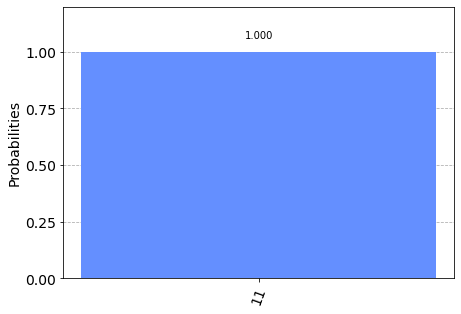

In [ ]:
plot_histogram(q_counts)